In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

項目の説明

ID :　ID - 目的変数と関連がないため削除  
name: プロジェクト名 - 目的変数と関連がないため削除  
main_category: メインカテゴリ - カテゴリと相関性があるため説明変数としては未使用  
currency: 通貨　（数値化して説明変数として採用）  
deadline: ファンディング締切日   
launched: 開始日  
goal: ファンディングを完了するための金額  (説明変数)  
pledged: 集められた金額   (プロジェクトが完了して得られる値のため削除)   
state: Current プロジェクトのステータス - 目的変数
backers: 支援者の数  (プロジェクトが完了して得られる値のため削除)     
country: ファンディング元の国  （数値化して説明変数として採用）  
usd pledged: 集まった金額（USD換算） (プロジェクトが完了して得られる値のため削除)    
Goal: 目標金額(USD換算)  (説明変数)    

In [33]:
df = pd.read_csv("./ks-projects-201801.csv")
display(df.head())
print(df.columns)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


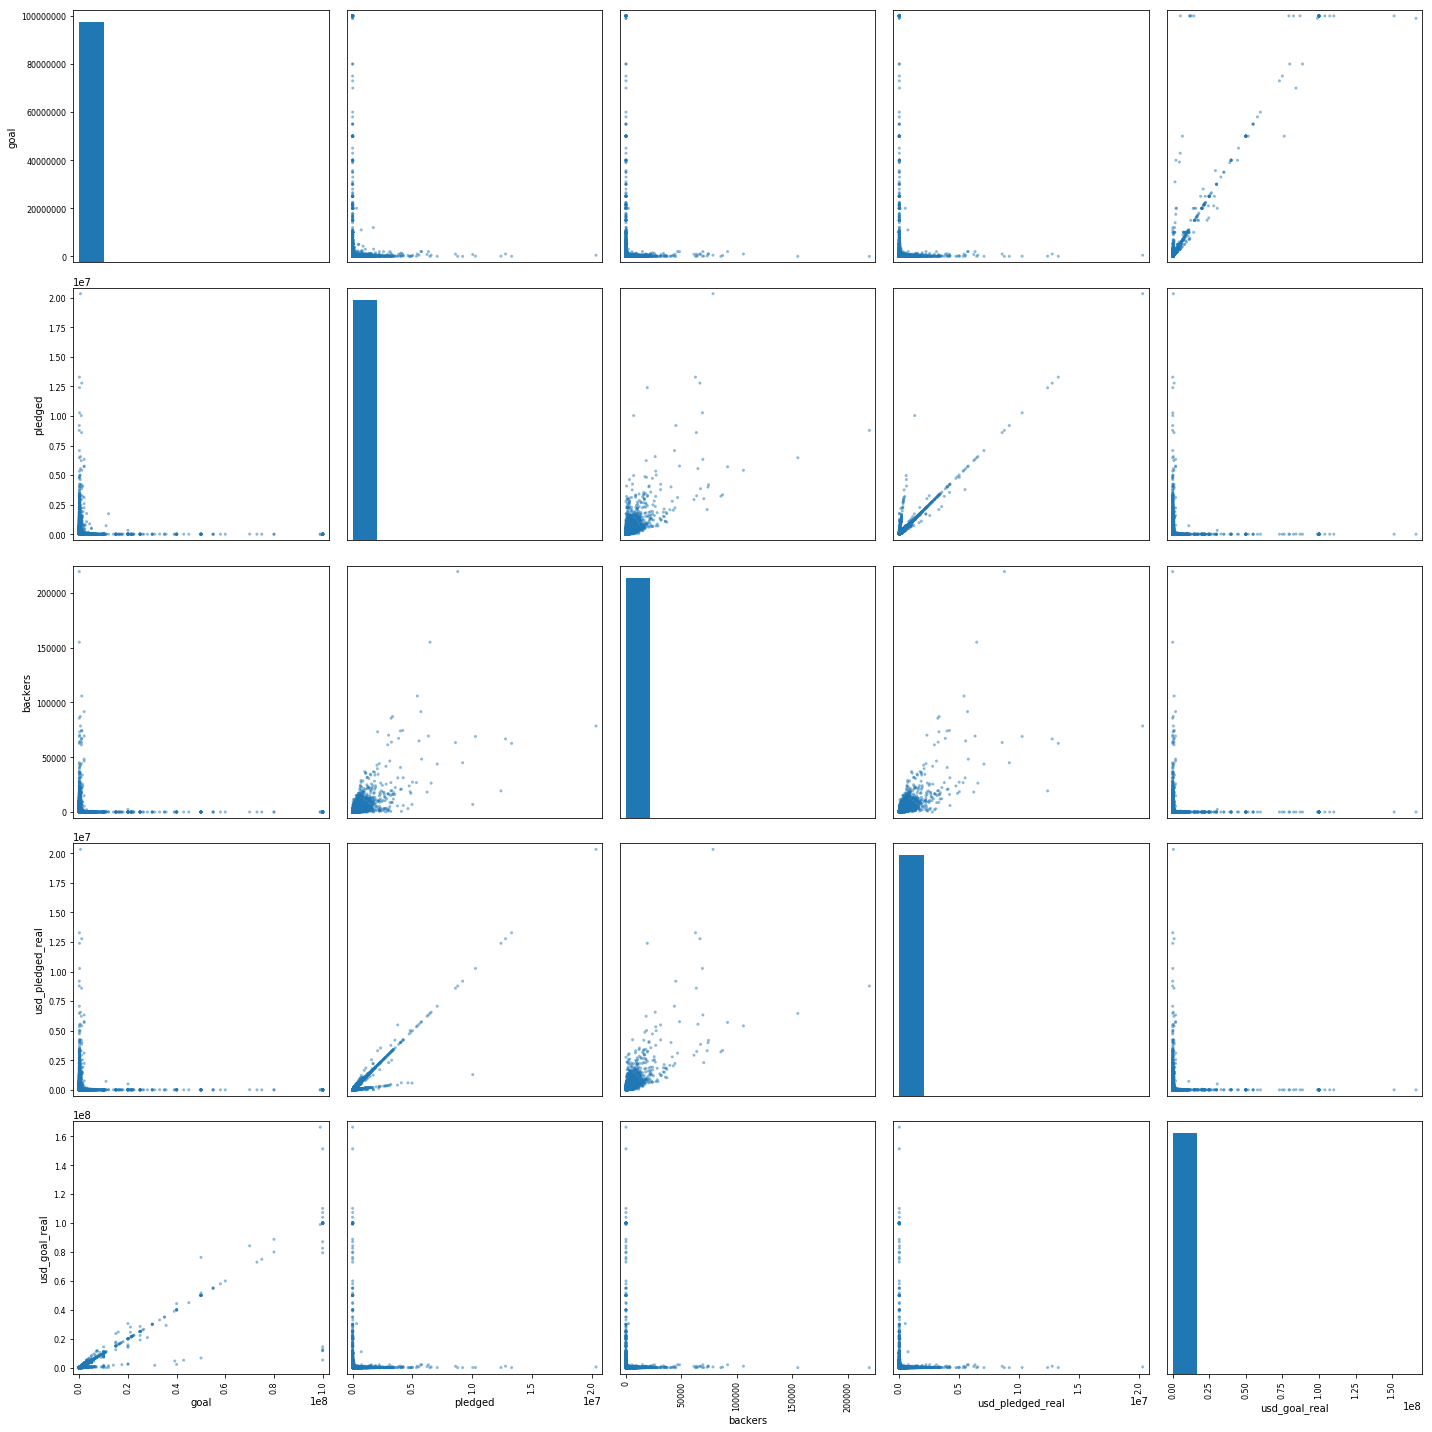

In [68]:
 # 散布図行列を計算、表示
pd.plotting.scatter_matrix(df,figsize=(20,20)) 
plt.tight_layout()
plt.show()

In [67]:
# category の中身
df['category'].unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

In [62]:
# 'main category' の中身
df['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [63]:
# 'currency' の中身
df['currency'].unique()

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

In [64]:
# 'country' の中身
df['country'].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

In [34]:
#欠損値の確　-> name, usd_pledged に欠損値がある
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [35]:
#'ID','name' は、目的変数'state' とは関連性はないため削除
df.drop(['ID','name','usd pledged'],axis=1,inplace=True)

In [36]:
df.describe()

,goal,pledged,backers,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 12 columns):
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 34.7+ MB


In [38]:
# 目的変数 state の値と状態
print(df['state'].value_counts(dropna=False))

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64


In [39]:
# 目的変数　stateをフラグに分解
dummy = pd.get_dummies(df, columns=['state'])
dummy = dummy.fillna(0)
#success, failed 以外の行を削除
success = dummy[dummy["state_successful"] == 1]
failed = dummy[dummy["state_failed"]==1]
sof = pd.concat([success,failed])
drop_columns = ["state_canceled","state_failed","state_live","state_suspended","state_undefined"]
sof = sof.drop(drop_columns, axis=1)

In [65]:
# 目的変数　state  'successful'を'1'に、'failed'を'0' に変換完了
sof["state_successful"].value_counts()

0    197719
1    133956
Name: state_successful, dtype: int64

In [41]:
#説明変数'main_category','category','currency','country'を数値化 
# ダミー変数map制作
def get_swap_list(l):
    return {v: i for i, v in enumerate(l)}

# main_category
mc_list = list(sof.main_category.unique())
mc_map = get_swap_list(mc_list)
# category
c_list = list(sof.category.unique())
c_map = get_swap_list(c_list)
# currency
currency_list = list(sof.currency.unique())
currency_map = get_swap_list(currency_list)
# country
country_list = list(sof.country.unique())
country_map = get_swap_list(country_list)

In [42]:
# ダミー変数に置き換え
sof.category = sof.category.map(c_map)
sof.main_category = sof.main_category.map(mc_map)
sof.currency = sof.currency.map(currency_map)
sof.country = sof.country.map(country_map)

In [43]:
# カラムの確認
print(sof.columns)

Index(['category', 'main_category', 'currency', 'deadline', 'goal', 'launched',
       'pledged', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real',
       'state_successful'],
      dtype='object')


In [44]:
sof.describe()

,category,main_category,currency,goal,pledged,backers,country,usd_pledged_real,usd_goal_real,state_successful
count,331675.000000,331675.000000,331675.000000,3.316750e+05,3.316750e+05,331675.000000,331675.000000,3.316750e+05,3.316750e+05,331675.000000
mean,38.247782,5.613830,0.567776,4.425157e+04,1.058400e+04,116.381581,0.898316,9.943461e+03,4.151000e+04,0.403877
std,35.011395,3.826723,1.496795,1.117917e+06,1.015917e+05,965.427268,2.829828,9.673293e+04,1.108930e+06,0.490674
min,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e-02,0.000000
25%,10.000000,2.000000,0.000000,2.000000e+03,5.000000e+01,2.000000,0.000000,5.000000e+01,2.000000e+03,0.000000
50%,28.000000,5.000000,0.000000,5.000000e+03,7.820000e+02,15.000000,0.000000,7.880000e+02,5.000000e+03,0.000000
75%,58.000000,9.000000,0.000000,1.500000e+04,4.657000e+03,63.000000,0.000000,4.608000e+03,1.500000e+04,1.000000
max,158.000000,14.000000,13.000000,1.000000e+08,2.033899e+07,219382.000000,22.000000,2.033899e+07,1.663614e+08,1.000000


In [45]:
# ファンディングの資金募集期間 (days) = (deadline - launched ) を計算して、追加
#tmp_days.days = pd.to_datetime(sof.deadline) - pd.to_datetime(sof.launched)
tmp_days = pd.to_datetime(sof.deadline) - pd.to_datetime(sof.launched)
tmp_days.dt.components
sof['days'] = tmp_days.dt.components.days #days をsof に追加

In [46]:
display(sof.columns)

Index(['category', 'main_category', 'currency', 'deadline', 'goal', 'launched',
       'pledged', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real',
       'state_successful', 'days'],
      dtype='object')

In [47]:
display(sof.head())

,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd_pledged_real,usd_goal_real,state_successful,days
5,0,0,0,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,224,0,52375.00,50000.00,1,34
6,1,0,0,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,16,0,1205.00,1000.00,1,19
11,2,1,0,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,100,0,12700.00,12500.00,1,29
14,3,2,1,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,761,1,121857.33,6469.73,1,27
18,4,1,0,2012-08-17,250.0,2012-08-02 14:11:32,250.0,7,0,250.00,250.00,1,14


In [48]:
sof.corr().style.background_gradient(cmap="autumn_r")

,category,main_category,currency,goal,pledged,backers,country,usd_pledged_real,usd_goal_real,state_successful,days
category,1,0.321704,0.07349,0.0129721,-0.020995,-0.030546,0.0622121,-0.0218786,0.0117875,-0.0918368,-0.0335821
main_category,0.321704,1,0.0502458,0.00736593,0.00294543,-0.0155353,0.0408154,0.00170953,0.00568057,-0.0634437,-0.016292
currency,0.07349,0.0502458,1,0.0187371,0.0342458,-0.00954973,0.866124,-0.00590528,0.00470072,-0.0593403,-0.00895146
goal,0.0129721,0.00736593,0.0187371,1,0.00796512,0.00479392,0.0127506,0.00595475,0.952614,-0.0250991,0.0226918
pledged,-0.020995,0.00294543,0.0342458,0.00796512,1,0.717316,0.0235415,0.953571,0.00572187,0.109507,0.00811521
backers,-0.030546,-0.0155353,-0.00954973,0.00479392,0.717316,1,-0.00803347,0.752291,0.00520805,0.12579,-4.95513e-05
country,0.0622121,0.0408154,0.866124,0.0127506,0.0235415,-0.00803347,1,-0.00247555,0.00441726,-0.0574803,-0.00559624
usd_pledged_real,-0.0218786,0.00170953,-0.00590528,0.00595475,0.953571,0.752291,-0.00247555,1,0.00635433,0.108298,0.00865144
usd_goal_real,0.0117875,0.00568057,0.00470072,0.952614,0.00572187,0.00520805,0.00441726,0.00635433,1,-0.0237352,0.0216067
state_successful,-0.0918368,-0.0634437,-0.0593403,-0.0250991,0.109507,0.12579,-0.0574803,0.108298,-0.0237352,1,-0.116437


In [49]:
# プロジェクト開始時点で値が確定しない説明変数列を削除
sof.drop(["launched","deadline","usd_pledged_real","usd_goal_real","backers","pledged"],axis=1,inplace=True)

In [50]:
sof.corr().style.background_gradient(cmap="autumn_r")

,category,main_category,currency,goal,country,state_successful,days
category,1,0.321704,0.07349,0.0129721,0.0622121,-0.0918368,-0.0335821
main_category,0.321704,1,0.0502458,0.00736593,0.0408154,-0.0634437,-0.016292
currency,0.07349,0.0502458,1,0.0187371,0.866124,-0.0593403,-0.00895146
goal,0.0129721,0.00736593,0.0187371,1,0.0127506,-0.0250991,0.0226918
country,0.0622121,0.0408154,0.866124,0.0127506,1,-0.0574803,-0.00559624
state_successful,-0.0918368,-0.0634437,-0.0593403,-0.0250991,-0.0574803,1,-0.116437
days,-0.0335821,-0.016292,-0.00895146,0.0226918,-0.00559624,-0.116437,1


In [51]:
# main_category とcategory は相関性があるため、main_category を削除
sof.drop(["main_category"],axis=1,inplace=True)

In [54]:
sof.corr().style.background_gradient(cmap="autumn_r")

,category,currency,goal,country,state_successful,days
category,1,0.07349,0.0129721,0.0622121,-0.0918368,-0.0335821
currency,0.07349,1,0.0187371,0.866124,-0.0593403,-0.00895146
goal,0.0129721,0.0187371,1,0.0127506,-0.0250991,0.0226918
country,0.0622121,0.866124,0.0127506,1,-0.0574803,-0.00559624
state_successful,-0.0918368,-0.0593403,-0.0250991,-0.0574803,1,-0.116437
days,-0.0335821,-0.00895146,0.0226918,-0.00559624,-0.116437,1


In [53]:
# Scikit-learnによるロジスティック回帰実装(説明変数 5つ)
Y = sof.state_successful.values
X = sof.drop(["state_successful"], axis=1).values
clf = SGDClassifier(loss='log', penalty='none', max_iter=1000, fit_intercept=True, random_state=1234)
clf.fit(X, Y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
w4 = clf.coef_[0, 3]
w5 = clf.coef_[0, 4]
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}'.format(w0, w1, w2, w3, w4, w5, w6))

w0 = 3385.728, w1 = -45.871, w2 = 636.585, w3 = -5.646, w4 = -645.281, w5 = 226.754


In [56]:
X.shape

(331675, 5)

In [57]:
# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(Y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(Y, y_est)))

対数尤度 = -13.478
正答率 = 60.977%


In [58]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(Y, y_est), 
                        index=['正解 = 資金調達失敗', '正解 = 資金調達成功'], 
                        columns=['予測 = 資金調達失敗', '予測 = 資金調達成功'])
conf_mat

,予測 = 資金調達失敗,予測 = 資金調達成功
正解 = 資金調達失敗,166743,30976
正解 = 資金調達成功,98453,35503
